In [1]:
# Импорты
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pylab as plt

# Часть один
### Будем использовать датасет по мобильным телефонам и предсказывать ценовой сегмент телефона.

In [2]:
sharing_url = 'https://drive.google.com/file/d/1XkKOS6jbke3JYWTj8V_xS46txe820rZ_/view?usp=sharing'
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.shape

(2000, 21)

## датасет достаточно скромный, но признаков аж 21! Посмотрим их ниже

In [5]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
# целевая переменная
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

### по этим данным можно сделать выводы, что классы сбалансированы.

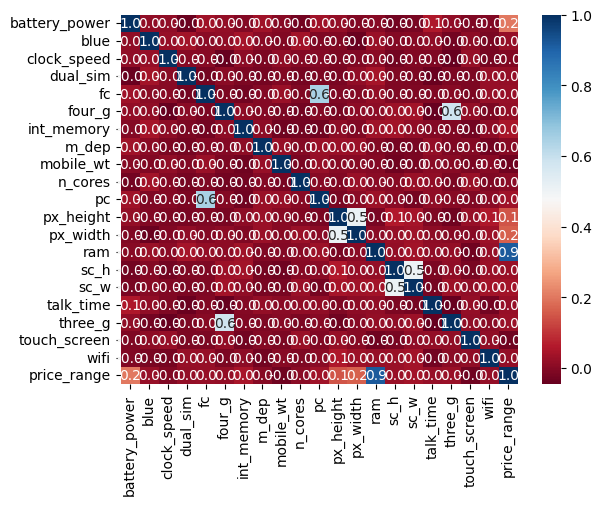

In [8]:
sb.heatmap(df.corr(), annot=True,
           cbar=True, cmap='RdBu', fmt='.1f')
plt.savefig('heatmap.png')
plt.show()

## Из матрицы видно очень слабую взаимосвязь между большинством переменных. Стоит обратить внимание, что ram имеет значительную связть с нашей целевой переменной

### Конечно, необходимо изначально понимать что нам важно в данной задаче, какие требования у бизнеса. Задача сформулированна обобщенно, поэтому сделаем допущение, что нам нужно определять все классы. Классы у нас сбалансированы, поэтому откажемся от F1. Предлагается использовать базовую метрику Accuracy.



#Baseline logistic regression

In [9]:
X = df[df.columns.to_list()[:-1]]
y = df['price_range']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

model = LogisticRegression(multi_class="ovr")

# Train the model
reg = model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
"Accuracy:",metrics.accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('Accuracy:', 0.685)

In [11]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=b2136ca6756a9a8ff56e814a17ab5da366424f1e41ce1e95ffce3fe68112d4cd
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [12]:
import eli5
eli5.show_weights(reg, feature_names=X.columns.tolist())

## Из таблицы видно, что для нет единого параметра, который бы играл важную роль для всех сегментов сразу. Попробуем настроить гиперпараметры

In [13]:
model = LogisticRegression(multi_class="ovr", solver='liblinear', max_iter=1000)
# multi_class="ovr" - для мультиклассовой классификации
# solver='liblinear' - 'supports both L1 and L2 regularization' - нашел в инете гайд по мультиклассовой классификации, где рекомендовали затестить его
# max_iter=1000 - из кода "lbfgs failed to converge (status=1): TOP: TOTAL NO. of ITERATIONS REACHED LIMIT."

reg = model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
"Accuracy:",metrics.accuracy_score(y_test, y_pred)

('Accuracy:', 0.755)

# Значительный прирост в точности!

# Попробуем скейлинг и посмотрим на результат

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(multi_class="ovr", solver='liblinear', max_iter=1000)
reg = model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
"Accuracy:",metrics.accuracy_score(y_test, y_pred)

('Accuracy:', 0.82)

In [15]:
eli5.show_weights(reg, feature_names=X.columns.tolist())

# 82% Точности! Это уже очень хороший результат. Признаки совершенно другие. Далее попробуем его улучшить за счет использования бустинга

## Параметры для настройки бустинга:

### Основные параметры:
1.   boosting_type (default='gbdt'): gbdt (traditional Gradient Boosting Decision Tree), dart (Dropouts meet Multiple Additive Regression Trees), rf (Random Forest)
2.   num_leaves (default=31) - Maximum tree leaves
3.   max_depth (default=-1) - Maximum tree depth
4.   learning_rate (default=0.1)
5.   n_estimators (default=100)
6.   subsample_for_bin (default=200000) - samples for constructing bins
7.   objective (default=None) - Default: ‘regression’ for LGBMRegressor, ‘binary’ or ‘multiclass’ for LGBMClassifier, ‘lambdarank’ for LGBMRanker.
8.   class_weight (default=None) - Weights associated with classes in the form {class_label: weight}. Use this parameter only for multi-class classification task; for binary classification task you may use is_unbalance or scale_pos_weight parameters.

### Дополнительные:
9.   min_split_gain  (default=0.) - Minimum loss reduction required to make a further partition on a leaf node of the tree.
10.  min_child_weight (default=1e-3)
11.  min_child_samples (default=20)
12.  subsample (default=1.) – Subsample ratio of the training instance
13.  subsample_freq (default=0) – Frequency of subsample
14.  colsample_bytree (default=1.) – Subsample ratio of columns when constructing each tree.
15.  reg_alpha (default=0.) – L1 regularization term on weights.
16.  reg_lambda (default=0.) – L2 regularization term on weights.
17.  random_state (default=None)

# Протестируем базовую модель бустинга

In [155]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

model = LGBMClassifier(objective='multiclass')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy)

# og loss
logloss = log_loss(y_test, y_prob)
print('Log loss:', logloss)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print('\nClassification report:\n', report)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 20
[LightGBM] [Info] Start training from score -1.368673
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.379650
[LightGBM] [Info] Start training from score -1.411043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Accuracy: 0.93
Log loss: 0.2050750374450699

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.98      0.86      0.91        50
           2       0.83      0.94      0.88        47
           3       0.95      0.95      0.95        61

    

# Точность сразу оказалась выше, чем на линейной модели!

## Пробуем lightgbm.cv
lightgbm.cv(params, train_set, num_boost_round=100, folds=None, nfold=5, stratified=True, shuffle=True, metrics=None, feval=None, init_model=None, feature_name='auto', categorical_feature='auto', fpreproc=None, seed=0, callbacks=None, eval_train_metric=False, return_cvbooster=False)

In [91]:
import lightgbm as lgb

lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'n_estimators':200,
    'objective': 'multiclass',
    'num_class': 4,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves' : 8,

}

# Create a LightGBM dataset
data = lgb.Dataset(X_train, label=y_train)

# CV Parameters
N_FOLDS = 5

# Cross-validate
cv_results = lgb.cv(lgbm_params,
                    data,
                    nfold=N_FOLDS)

print('\nBest num_boost_round:', len(cv_results['valid multi_logloss-mean']))
print('Best CV valid multi_logloss-mean:', cv_results['valid multi_logloss-mean'][-1])

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:685: UserWarning: Found 'n_estimators' in params. Will use it instead of 'num_boost_round' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'num_boost_round' argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

## Покрутим    'feature_fraction', 'bagging_fraction', 'bagging_freq'

In [90]:
lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'n_estimators':200,
    'objective': 'multiclass',
    'num_leaves': 31,
    'num_class': 4,
    'metric': 'multi_logloss',
    'learning_rate': 0.1,
    'num_leaves' : 8,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,

}

cv_results = lgb.cv(lgbm_params,
                    data,
                    nfold=N_FOLDS)

print('\nBest num_boost_round:', len(cv_results['valid multi_logloss-mean']))
print('Best CV valid multi_logloss-mean:', cv_results['valid multi_logloss-mean'][-1])

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:685: UserWarning: Found 'n_estimators' in params. Will use it instead of 'num_boost_round' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'num_boost_round' argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.068667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070182 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

## Стало чуть лучше

In [120]:
lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'n_estimators':200,
    'objective': 'multiclass',
    'num_leaves': 15,
    'num_class': 4,
    'metric': 'multi_logloss',
    'learning_rate': 0.06,
    'num_leaves' : 10,
    'feature_fraction': 1,
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
    'verbose': 1

}

cv_results = lgb.cv(lgbm_params,
                    data,
                    nfold=N_FOLDS)

print('\nBest num_boost_round:', len(cv_results['valid multi_logloss-mean']))
print('Best CV valid multi_logloss-mean:', cv_results['valid multi_logloss-mean'][-1])

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:685: UserWarning: Found 'n_estimators' in params. Will use it instead of 'num_boost_round' argument
  _log_warning(f"Found '{alias}' in params. Will use it instead of 'num_boost_round' argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1440, number of used features: 20
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

# Best CV valid multi_logloss-mean: 0.2028536629346823
# Остановлюсь на этом и обучу модель

In [157]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

model = lgb.train(lgbm_params, data)

y_pred = model.predict(X_test)
y_pred_labels = [list(pred).index(max(pred)) for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_labels)
print("Accuracy:", accuracy)

print("\nПримеры хороших предсказаний:")
good_examples = []
for i, (predicted_label, true_label) in enumerate(zip(y_pred_labels, y_test)):
    if predicted_label == true_label:
        print("Предсказанная метка:", predicted_label, "| Фактическая метка:", true_label)
        good_examples.append(X_test[i])
        if len(good_examples) == 3:
            break

print("\nПримеры плохих предсказаний:")
bad_examples = []
for i, (predicted_label, true_label) in enumerate(zip(y_pred_labels, y_test)):
    if predicted_label != true_label:
        print("Предсказанная метка:", predicted_label, "| Фактическая метка:", true_label)
        bad_examples.append(X_test[i])
        if len(bad_examples) == 3:
            break

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 20
[LightGBM] [Info] Start training from score -1.368673
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.379650
[LightGBM] [Info] Start training from score -1.411043
Accuracy: 0.94

Примеры хороших предсказаний:
Предсказанная метка: 3 | Фактическая метка: 3
Предсказанная метка: 0 | Фактическая метка: 0
Предсказанная метка: 2 | Фактическая метка: 2

Примеры плохих предсказаний:
Предсказанная метка: 3 | Фактическая метка: 2
Предсказанная метка: 2 | Фактическая метка: 1
Предсказанная метка: 2 | Фактическая метка: 3


# Дополнительно проверим предсказания на тестовом файле
## Загружаем и обрабатываем данные для теста

In [181]:
sharing_url_test = "https://drive.google.com/file/d/1HVlLLVkAhofK38jmBVPXzT9lPYq63Q7Q/view?usp=sharing"
download_url_test = "https://drive.google.com/uc?id=" + sharing_url_test.split("/")[-2]

df_test = pd.read_csv(download_url_test).drop('id', axis=1)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [182]:
scaler = StandardScaler()
scaler.fit(df_test)
X_test = scaler.transform(df_test)

(1000, 20)

<Axes: xlabel='predictions'>

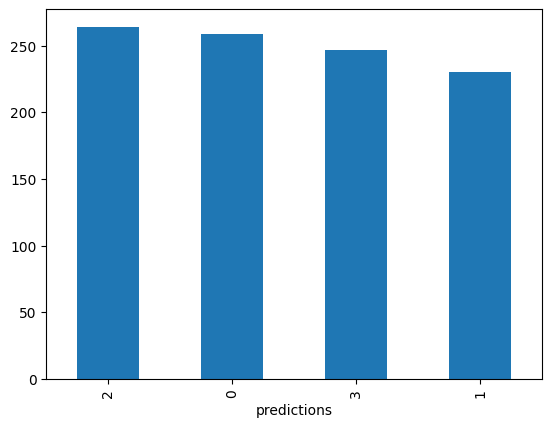

In [187]:
y_pred_test = model.predict(X_test)
y_pred_labels = [list(pred).index(max(pred)) for pred in y_pred_test]
df_test['predictions'] = y_pred_labels
df_test['predictions'].value_counts().plot(kind="bar")

# Видно, что распределение досттаочно равномерное

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1800, number of used features: 20
[LightGBM] [Info] Start training from score -1.368673
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.379650
[LightGBM] [Info] Start training from score -1.411043


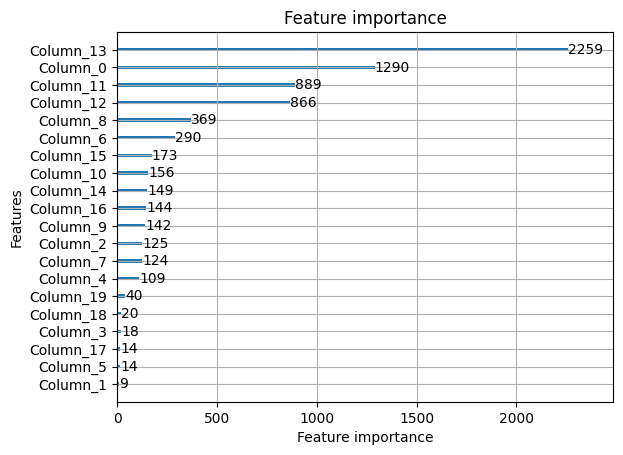

('Column_0', 'battery_power')
('Column_1', 'blue')
('Column_2', 'clock_speed')
('Column_3', 'dual_sim')
('Column_4', 'fc')
('Column_5', 'four_g')
('Column_6', 'int_memory')
('Column_7', 'm_dep')
('Column_8', 'mobile_wt')
('Column_9', 'n_cores')
('Column_10', 'pc')
('Column_11', 'px_height')
('Column_12', 'px_width')
('Column_13', 'ram')
('Column_14', 'sc_h')
('Column_15', 'sc_w')
('Column_16', 'talk_time')
('Column_17', 'three_g')
('Column_18', 'touch_screen')
('Column_19', 'wifi')


In [142]:
lgb.plot_importance(model)
plt.show()

for i in zip(data.get_feature_name(),X.columns.to_list()):
  print(i)

# Из данных выше видно, что ключевые признаки: ram, battery_power, px_height, px_width

### Данные признаки полностью совпадают с линейной моделью для класса 3
### Считаю, что так происходит из-за определенных связей между данными, т.е. линейная модель тоже хорошо их определила

## РЕЗУЛЬТАТ
## Линейная модель логистической регрессии показала лучший резльутат = 82% accuracy
## Градиентный бустинг показал лучший резльутат = 94% accuracy

# Вторая часть
### Будем предсказывать по показателям датчиков наличие возгорания в помещении

In [189]:
sharing_url = "https://drive.google.com/file/d/1TJI9IVaZQtaTJUezLrC3WaQ-eEC40AGG/view?usp=sharing"
download_url = "https://drive.google.com/uc?id=" + sharing_url.split("/")[-2]

df = pd.read_csv(download_url).drop('Unnamed: 0', axis=1)
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UTC,62630.0,1.654792e+09,110002.488078,1.654712e+09,1.654743e+09,1.654762e+09,1.654778e+09,1.655130e+09
Temperature[C],62630.0,1.597042e+01,14.359576,-2.201000e+01,1.099425e+01,2.013000e+01,2.540950e+01,5.993000e+01
Humidity[%],62630.0,4.853950e+01,8.865367,1.074000e+01,4.753000e+01,5.015000e+01,5.324000e+01,7.520000e+01
TVOC[ppb],62630.0,1.942058e+03,7811.589055,0.000000e+00,1.300000e+02,9.810000e+02,1.189000e+03,6.000000e+04
eCO2[ppm],62630.0,6.700210e+02,1905.885439,4.000000e+02,4.000000e+02,4.000000e+02,4.380000e+02,6.000000e+04
Raw H2,62630.0,1.294245e+04,272.464305,1.066800e+04,1.283000e+04,1.292400e+04,1.310900e+04,1.380300e+04
Raw Ethanol,62630.0,1.975426e+04,609.513156,1.531700e+04,1.943500e+04,1.950100e+04,2.007800e+04,2.141000e+04
Pressure[hPa],62630.0,9.386276e+02,1.331344,9.308520e+02,9.387000e+02,9.388160e+02,9.394180e+02,9.398610e+02
PM1.0,62630.0,1.005943e+02,922.524245,0.000000e+00,1.280000e+00,1.810000e+00,2.090000e+00,1.433369e+04
PM2.5,62630.0,1.844678e+02,1976.305615,0.000000e+00,1.340000e+00,1.880000e+00,2.180000e+00,4.543226e+04


In [191]:
df['eCO2[ppm]'].value_counts()

eCO2[ppm]
400     31922
404       942
401       925
406       918
408       896
        ...  
2231        1
1436        1
1602        1
2501        1
1844        1
Name: count, Length: 1713, dtype: int64

In [192]:
df['Fire Alarm'].value_counts()

Fire Alarm
1    44757
0    17873
Name: count, dtype: int64

## Сразу видно, что данные имеют очень высокий разброс
### Посмотрим на корреляцию

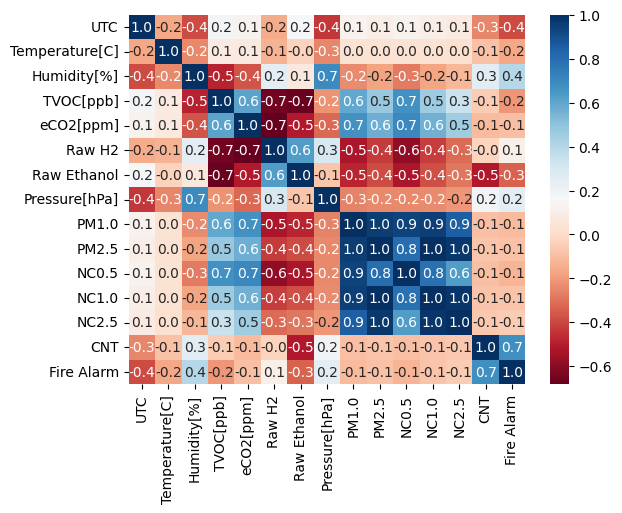

In [195]:
sb.heatmap(df.corr(), annot=True,
           cbar=True, cmap='RdBu', fmt='.1f')
plt.savefig('heatmap.png')
plt.show()

## На этот раз между переменными действительно прослеживается взаимосвязь.
## На нашу целевую переменную больше всего имеет влияние признаки CNT (номер записи) и Humidity

## В данном случае решается задача бинарной классификации. Из логики следует заключение, что важно лишний раз предупредить о возгорании, чем нет, но в данных присутсвует сильный дисбаланс, поэтому принято решение взять F1-меру

# LogReg Baseline

In [201]:
X = df[df.columns.to_list()[:-1]]
y = df['Fire Alarm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


model = LogisticRegression()
reg = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
"F1-score:",metrics.f1_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


('F1-score:', 0.9921805183199284)

### "Голая" модель показала подозрительно хороший результат в 99%. Кажется, что такой высокий результат получился благодаря сильным взаимосвязям между переменными. Посмотрим признаки, и предлагается на данном этапе сразу попробовать бустинг

In [202]:
eli5.show_weights(reg, feature_names=X.columns.tolist())

Weight?,Feature
+16.829,CNT
+12.810,<BIAS>
+2.365,eCO2[ppm]
+2.249,NC0.5
+1.446,PM1.0
+1.195,Humidity[%]
+0.779,Raw H2
+0.632,PM2.5
+0.573,NC1.0
-0.083,NC2.5


# Видно, что матрица корреляций показала правдивую информацию по данным и связям с целевой переменной

# Попробуем бустинг

In [207]:
model = LGBMClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

f1 = metrics.f1_score(y_test, y_pred)
print('\nF1:', f1)

# og loss
logloss = log_loss(y_test, y_prob)
print('Log loss:', logloss)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print('\nClassification report:\n', report)

[LightGBM] [Info] Number of positive: 40282, number of negative: 16085
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 56367, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714638 -> initscore=0.918018
[LightGBM] [Info] Start training from score 0.918018

F1: 0.9997765363128491
Log loss: 0.0023064762192137357

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1788
           1       1.00      1.00      1.00      4475

    accuracy                           1.00      6263
   macro avg       1.00      1.00      1.00      6263
weighted avg       1.00      1.00      1.00      6263



# Результаты снова отличные, проверим на CV

In [224]:
import lightgbm as lgb

lgbm_params =  {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',

}

data = lgb.Dataset(X_train, label=y_train)

N_FOLDS = 5

# Cross-validate
cv_results = lgb.cv(lgbm_params,
                    data,
                    nfold=N_FOLDS)

print('\nBest num_boost_round:', len(cv_results['valid binary_logloss-mean']))
print('Best CV valid binary_logloss-mean:', cv_results['valid binary_logloss-mean'][-1])

[LightGBM] [Info] Number of positive: 32225, number of negative: 12868
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 45093, number of used features: 14
[LightGBM] [Info] Number of positive: 32225, number of negative: 12868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 45093, number of used features: 14
[LightGBM] [Info] Number of positive: 32226, number of negative: 12868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024794 seconds.
You can set `force_col_wise=true` to remo

# Кажется, что данную задачу можно считать выполненной. Благодаря отличным данным задача решается легко даже с помощью линейной модели. Бустинг улучшил результат, но уже не так значительно. 